#### Notes<br>

This compares vfields for before and after the fix where we work in the sky frame first

Rotating disk - 40 km/s<br>
w/ structural params<br>
1 bin for the entire galaxy<br>
using fill nan

In [1]:
from fit2d import Galaxy, RingModel
from fit2d.mcmc import LinearPrior
from fit2d.mcmc import emcee_lnlike, piecewise_start_points
from fit2d.models import PiecewiseModel

from astropy.io import fits
import copy
from datetime import datetime
import glob
import joblib
import numpy as np
import os

import emcee
from emcee import EnsembleSampler, moves

In [2]:
from fit2d._velocity_field_generator import create_2d_velocity_field, create_2d_velocity_field_old 

from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
home_directory = "/Users/stephencoffey/Downloads/little-things/data"
ring_param_file = f"{home_directory}/NGC2366_ring_parameters_rohit.txt"

ring_model = RingModel(
    ring_param_file=ring_param_file,
    fits_xdim=580,
    fits_ydim=580,
    distance=3400
)
ring_model.update_structural_parameters(inc=np.pi/4, pos_angle=np.pi/6)

In [4]:
vfield_new = create_2d_velocity_field(
    radii = [0.099, 5],
    v_rot = [40,40],  # just fill in any velocity
        i=np.pi/4,
        pa=np.pi/6,
        v_sys = 100,
        x_dim = 580,
        y_dim = 580,
        x_center = 290,
        y_center = 290, 
        kpc_per_pixel=0.024745278134775603
)

vfield_old = create_2d_velocity_field_old(
        radii = [0.099, 5],
        v_rot = [40,40],
        ring_model = ring_model,
        kpc_per_pixel=0.024745278134775603,
        v_systemic = 100,
        image_xdim = 580,
        image_ydim = 580
)

/Users/stephencoffey/anaconda2/envs/anna_env/lib/python3.7/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/Users/stephencoffey/anaconda2/envs/anna_env/lib/python3.7/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/Users/stephencoffey/anaconda2/envs/anna_env/lib/python3.7/site-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [5]:
#np.save("vfield_new.npy", vfield_new)
#np.save("vfield_old.npy", vfield_old)

In [6]:
#vfield_new = np.load("vfield_new.npy")
#vfield_old = np.load("vfield")

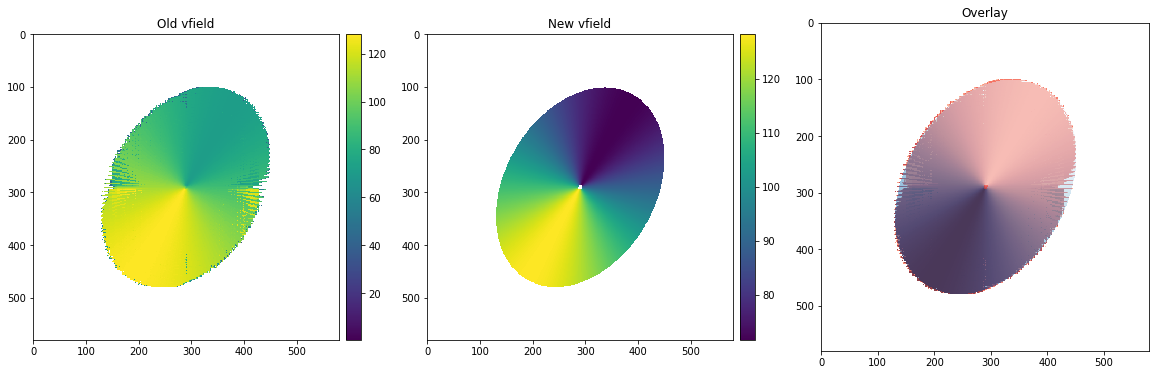

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,15))
ax1.set_title("Old vfield")
ax2.set_title("New vfield")
ax3.set_title("Overlay")
im1 = ax1.imshow(vfield_old)
im2 = ax2.imshow(vfield_new)
ax3.imshow(vfield_old, alpha = 0.75, cmap = 'Reds')
ax3.imshow(vfield_new, alpha = 0.5, cmap = 'Blues')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

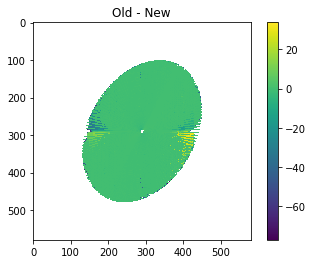

In [8]:
plt.imshow(vfield_old - vfield_new)
plt.title("Old - New")
plt.colorbar()